Il contient 200 échantillons sur le budget alloué aux publicités télévisées, à la radio et dans les journaux, ainsi que les ventes résultantes.Nous allons essayer de prédire le volume de vente en fonction du budget publicitaire en TV, radio et journaux.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [39]:
vente=pd.read_csv(r"C:\Users\nangs\Documents\cours Ynov\machine_learning\regression lineaire\advertising.csv")
vente 

,tv,radio,journaux,ventes
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [40]:
vente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tv        200 non-null    float64
 1   radio     200 non-null    float64
 2   journaux  200 non-null    float64
 3   ventes    200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


on se rend compte qu'il n y a pas de valeurs nulles et les variables sont bien typées 

In [42]:
vente.describe()

,tv,radio,journaux,ventes
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


C'est un dataset classique issu du livre référence An introduction to Statistical Learning. Il contient 200 échantillons sur le budget alloué aux publicités télévisées, à la radio et dans les journaux, ainsi que les ventes résultantes.

### **Nous allons essayer de prédire le volume de vente en fonction du budget publicitaire en TV, radio et journaux.**

Avant d'entraîner le modèle, il convient de regarder les relations entre les différentes variables. Pour cela nous utilisons Seaborn et Matplotlib, librairies de visualisation en Python.

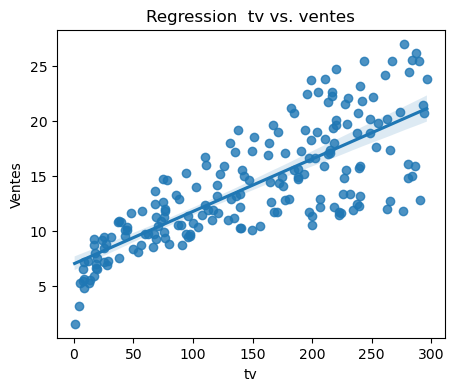

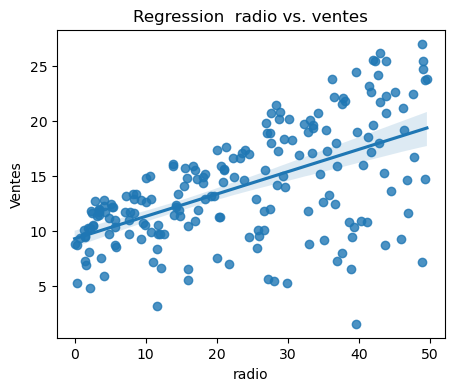

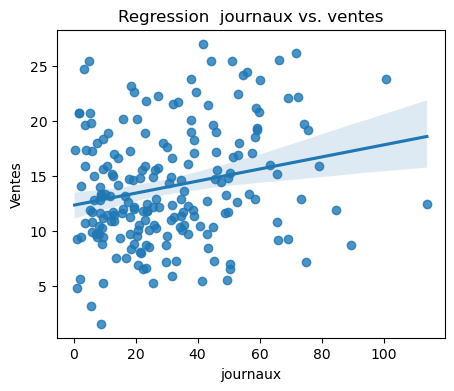

In [45]:
for mode in vente.columns.unique():
    if mode != 'ventes':  # S'assurer que la colonne "ventes" n'est pas incluse
        plt.figure(figsize=(5,4))
        sns.regplot(data=vente, x=mode, y='ventes')  
        plt.title(f'Regression  {mode} vs. ventes')  
        plt.xlabel(mode)  
        plt.ylabel('Ventes')  
        plt.show()  

La zone bleu pâle reflète l'incertitude du modèle. Plus elle est grande, moins la régression est fiable.

    **tv** est plus prédictive des ventes que  **radio**;

    
    **radio**  est plus prédictive que  **journaux** .

<Axes: >

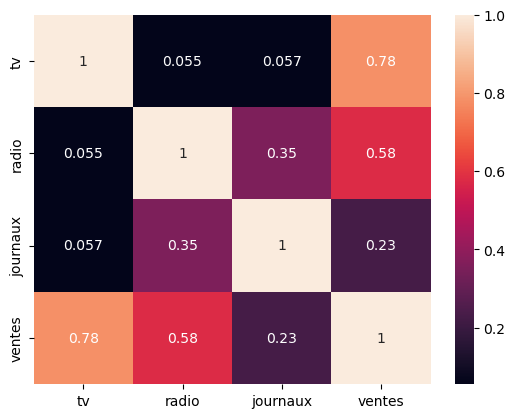

In [47]:
# calculons la matrice de corelation 
matcor=vente.corr()
# affichons la heatmap
sns.heatmap(matcor,annot=True)# annot=True permet d afficher des valeurs 

A partir de la matrice de correlation, on se rend compte effectivement que la correlation lineaire  entre vente et journaux est très faible et plus importnate avec tv. ce qui confirme effectivement notre intuition 

### **Choisissons le modèle de régression linéaire de scikit-learn.**

In [50]:
regression=LinearRegression()
# on doit divisier nos variables
X=vente.iloc[:,0:3]
Y=vente.iloc[:,3]
# on divise nos donnéees (entrainement et test)
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
#entrainement du modele 
regression.fit(X_train,Y_train)

LinearRegression()

En fixant une valeur spécifique pour random_state, vous vous assurez que les opérations aléatoires se déroulent toujours de la même manière. Les résultats sont reproductibles et vous pouvez comparer différents modèles.

Pour estimer la performance sur le sous-ensemble de test, il faut tout d'abord obtenir les prédictions pour  X_test  :

In [53]:
Y_pred=regression.predict(X_test)

On peut maintenant calculer l'écart entre les vraies valeurs de test  (y_test)  et celles prédites par le modèle.

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
print(f"RMSE: {mean_squared_error(Y_test, Y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(Y_test, Y_pred)}")

RMSE: 3.1740973539761046
MAPE: 0.15198846602831229


**Difficile à dire si le modèles est bien ou pas , comme la RMSE n'est pas absolue. Une MAPE de 0,15 semble bien, car plus proche de 0 que de 1.**

### **Essayons d'ameliorer notre modele**

1) Notons que l amplitude de tv est très grande par rapport aux autres variables (**nous allons normaliser les données**)
2) les nuages de point de tv suivent une courbe , donc nous allons plutot utiliser la regression polynomiale


In [58]:
# Normalisation des données 
from sklearn.preprocessing import MinMaxScaler
# elevons les donnes de tv au carré
vente["tv2"]=vente.tv*vente.tv
scaler=MinMaxScaler()
scaler.fit(vente)
# enfin transformer les données 
vente_transform=scaler.transform(vente)

La méthode  **transform**  retourne un  array  et non une dataframe. Pour une question de simplification des scripts, je vais recréer la dataframe  df  

In [60]:
vente_nouv=pd.DataFrame(vente_transform,columns=["tv", "radio" ,"journaux"	,"ventes","tv2"])
vente_nouv

,tv,radio,journaux,ventes,tv2
0,0.775786,0.762097,0.605981,0.807087,0.602664
1,0.148123,0.792339,0.394019,0.346457,0.022535
2,0.055800,0.925403,0.606860,0.303150,0.003362
3,0.509976,0.832661,0.511873,0.665354,0.261253
4,0.609063,0.217742,0.510994,0.444882,0.372080
...,...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220,0.016605
196,0.316199,0.098790,0.068602,0.318898,0.101001
197,0.596212,0.187500,0.053650,0.440945,0.356604
198,0.956713,0.846774,0.579595,0.940945,0.915495


Notre régression linéaire est maintenant une régression polynomiale grâce à la présence du terme quadratique  tv2  . Entraînons-la.

In [62]:
X = vente_nouv[['tv','radio','journaux', 'tv2']]
y = vente_nouv.ventes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

regression.fit(X_train, y_train)
y_hat_test = regression.predict(X_test)

print(f"Coefficients: {regression.coef_}")
print(f"RMSE: {mean_squared_error(y_test, y_hat_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_hat_test)}")

Coefficients: [ 0.88007136  0.37464292  0.02197664 -0.36578279]
RMSE: 0.0036863988616064615
MAPE: 0.16200182799935664


**On note une nette amélioration par rapport au premier modèle**.

## **Exercice Il est possible d'aller encore plus loin en ajoutant le terme croisé  tv * radio  qui reflète l'effet cumulé d'une campagne de pub qui soit à la fois à la radio et à la télévision**